<a href="https://colab.research.google.com/github/cyberschoolinmoscow/robofootball/blob/cv_hw/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22cv_hw2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашее задание 2

- Загрузите изображение и переведите его в цветовое пространство HSV

- Настройте цветовой фильтр на баскетбольное кольцо так, чтобы маска была зашумлена. Пусть в ней будут отдельные белые пиксели и даже целые области, не соответствующие кольцу. Удалите этот шум с помощью морфологических операций, выводя все промежуточные этапы на экран

- Удалите шум с помощью фильтрации связных компонент, пользуясь указаниями в первом ответе по ссылке https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connectedcomponentswithstats-in-python

После выполнения закоммитьте задание в ветку *cv_hw* в своем репозитории.

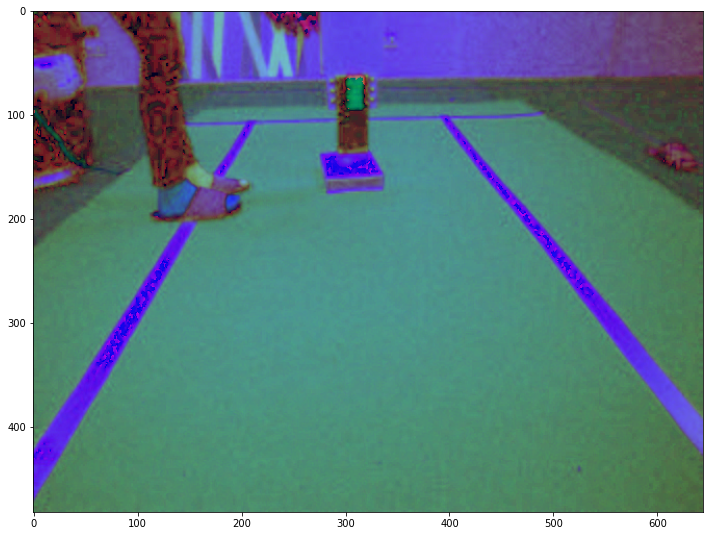

In [5]:
import cv2
import matplotlib.pyplot as plt

canvas = cv2.imread('/content/rgb_basket.jpg')
 #Преобразуем в HSV
img = cv2.cvtColor(canvas, cv2.COLOR_BGR2HSV)

#print(img.shape)

plt.figure(figsize=(12, 11))

#color scheme (gray)
plt.imshow(img)
plt.show()

#mask = cv2.inRange(img, (120, 130, 80), (230, 250, 200))

#plt.figure(figsize=(12, 11))
#plt.imshow(mask, cmap="gray")
#plt.show()

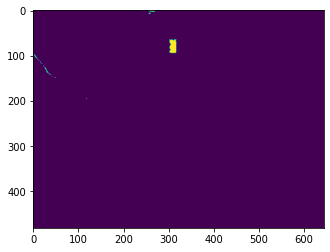

In [8]:
img_color_low = (1,40,60)
img_color_high = (18,255,200)
only_ring_hsv = cv2.inRange(img, img_color_low, img_color_high)
plt.imshow(only_ring_hsv)

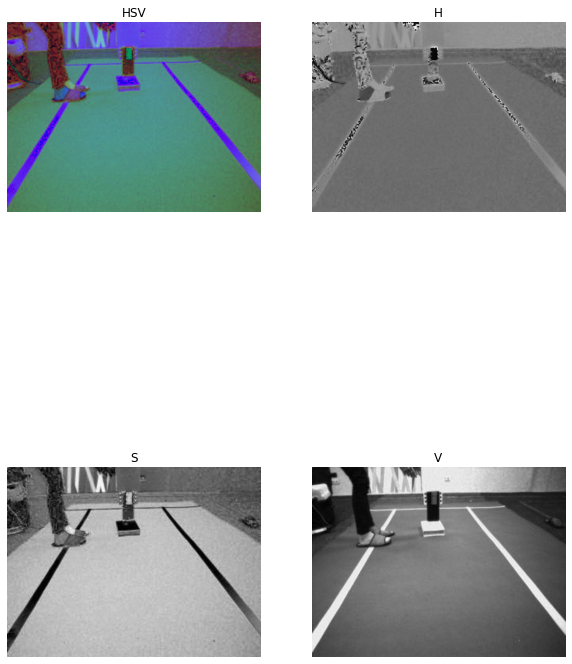

In [9]:
img_hsv = cv2.cvtColor(canvas, cv2.COLOR_BGR2HSV)
img_h = img_hsv[..., 0]
img_s = img_hsv[..., 1]
img_v = img_hsv[..., 2]

fig = plt.gcf()                      # Показывать картинки по каналу
fig.set_size_inches(10, 15)

plt.subplot(221)
plt.imshow(img_hsv)
plt.axis('off')
plt.title('HSV')

plt.subplot(222)
plt.imshow(img_h, cmap='gray')
plt.axis('off')
plt.title('H')

plt.subplot(223)
plt.imshow(img_s, cmap='gray')
plt.axis('off')
plt.title('S')

plt.subplot(224)
plt.imshow(img_v, cmap='gray')
plt.axis('off')
plt.title('V')

plt.show()

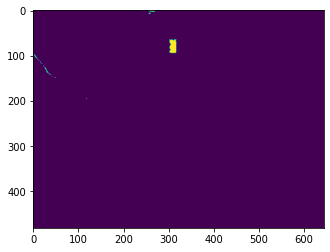

In [10]:
moments = cv2.moments(only_ring_hsv, 1)
x_moment = moments['m01']
y_moment = moments['m10']
area = moments['m00']
x = int(x_moment / area)
y = int(y_moment / area)

plt.imshow(only_ring_hsv)

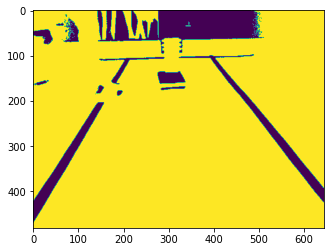

In [26]:
import sys
import numpy as np
import cv2 as cv
fn = '/content/rgb_basket.jpg'
img = cv.imread(fn)
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, img = cv.threshold(img, 150, 50, 1)
plt.imshow(img)

In [28]:
_, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
connectivity = 4  # You need to choose 4 or 8 for connectivity type
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh , connectivity , cv2.CV_32S)


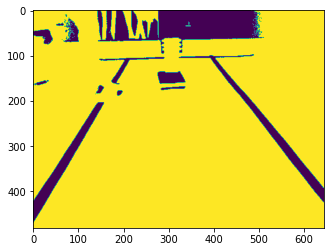

In [30]:

binary_map = (img > 0).astype(np.uint8)
connectivity = 4 # or whatever you prefer

output = cv2.connectedComponentsWithStats(binary_map, connectivity, cv2.CV_32S)
plt.imshow(binary_map)